# Исследование объявлений о продаже квартир

Имеются данные: архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача — установить параметры для определения рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Скачаем и изучим имеющуюся информацию

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head(25)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.shape

(23699, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видно, что есть пропуски. Немного далее заполним их. Посмотрим, есть ли явные дубликаты.

In [6]:
data.duplicated().sum()

0

Явных дубликатов нет. Посмотрим гистограммы частот для имеющихся данных

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

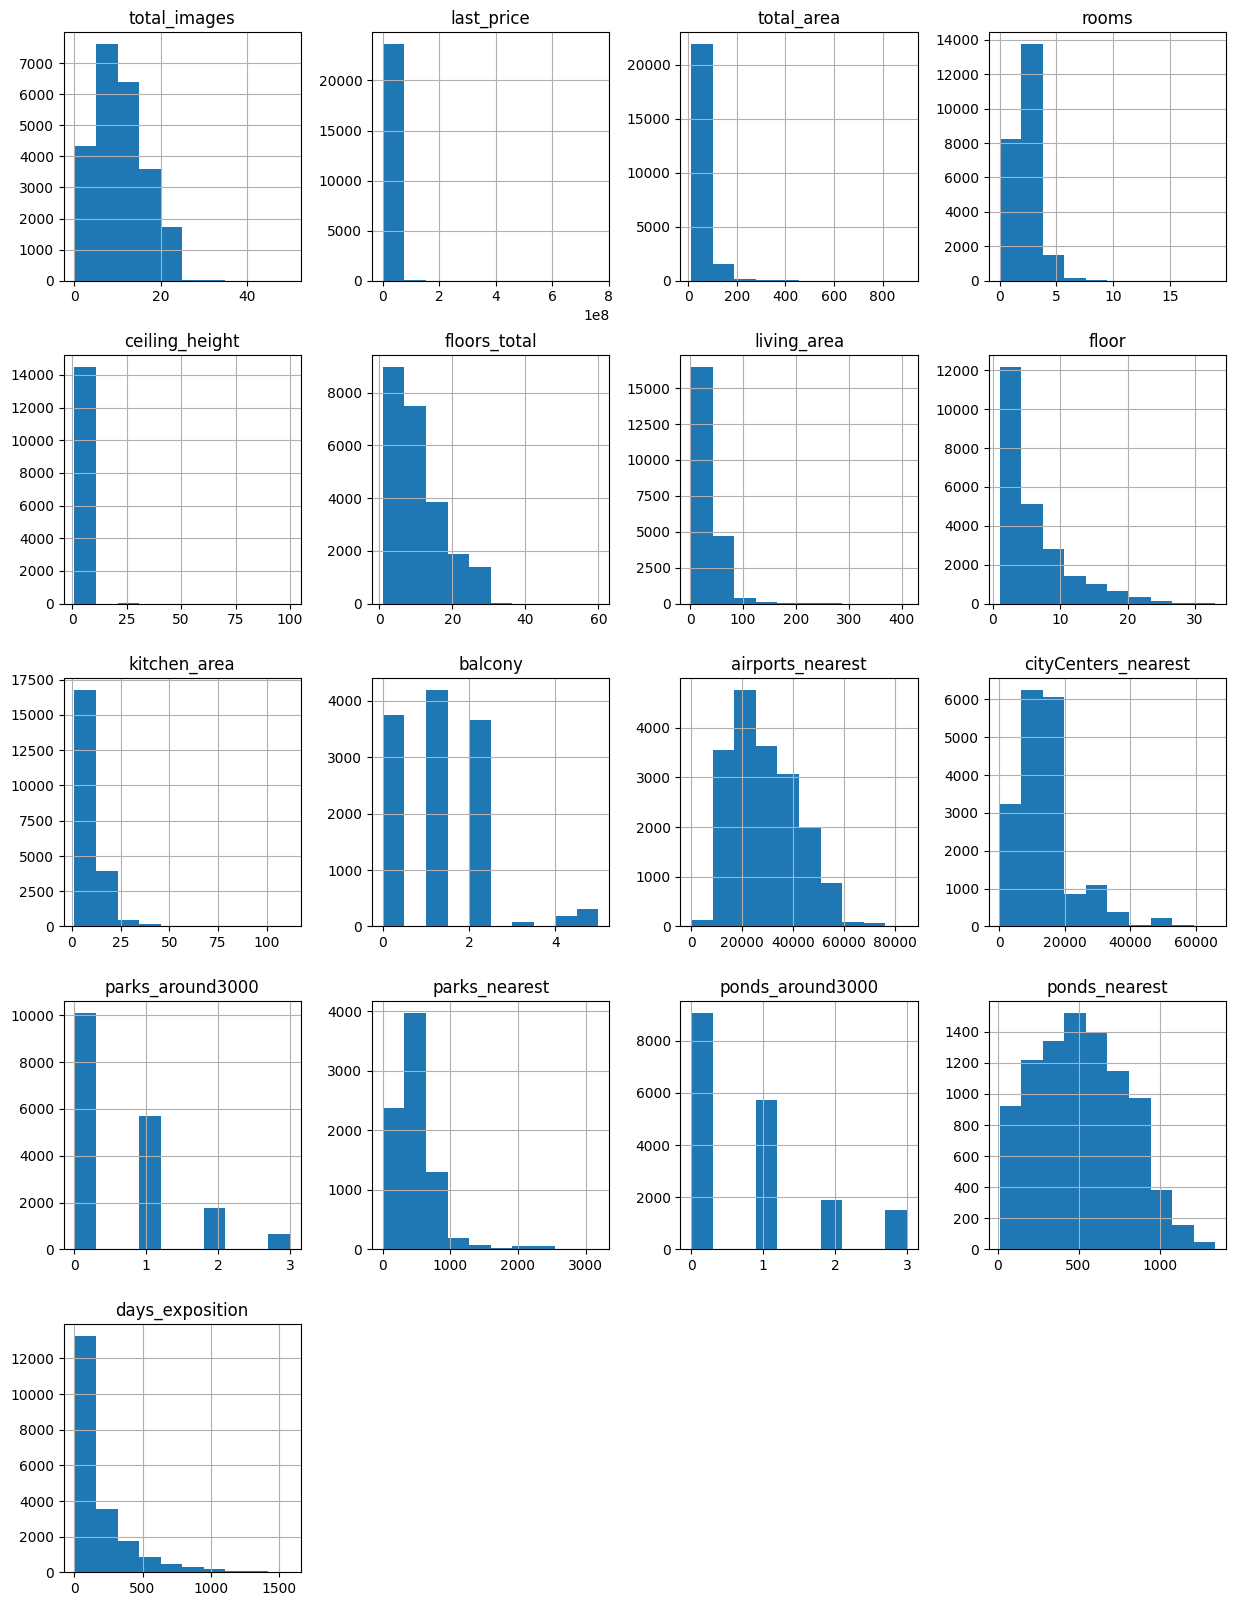

In [7]:
data.hist(figsize=(15, 20))

## Предобработка данных

In [8]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Самое большое число пропусков в столбце is_apartment, который представляет собой набор булевых значений. Наиболее вероятно, что пропуски - это значения False, что логично, потому что апартаменты продают заметно реже квартир. Тогда стоит заменить пропуски на False.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [10]:
data.query('ponds_around3000.isna() and parks_around3000.isna()').shape

(5518, 22)

Пропуски в ponds_around3000 и ponds_around3000 находятся в одних и тех же строчках. Скорее всего, они свидетельствуют о том, что в пределах этого расстояния нет парков, ничего не вписали. А раз нет парков, то нет и водоемов. Стоит заменить пропуски на 0.

In [11]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

Отсутствие значений для количества балконов явно говорит о том, что в квартире их нет, пользователь просто ничего не вписал, стоит заменить пропуски на 0.

In [12]:
data['balcony'] = data['balcony'].fillna(value=0) 

In [13]:
data.isna().sum().sort_values(ascending=False)

parks_nearest           15620
ponds_nearest           14589
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
balcony                     0
ponds_around3000            0
parks_around3000            0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Количество пропусков в parks_nearest и ponds_nearest соответствует количеству 0 в parks_around3000 и ponds_around3000. Логично, что если нет водоема или парка, то и посчитать расстояние до них через геоточку нельзя. В данном случае нельзя заменить пропуски на 0, так как это означает, что жилплощадь находится прямо в парке или водоеме, нельзя и заменить на среднее или медиану, потому что их попросту нет в пределах 3000 метров, это также будет искажение данных. Поэтому, несмотря на самое большое количество пропусков среди оставшихся столбцов с пропусками, лучше оставить все как есть.

In [14]:
data.query('parks_around3000 == 0 and parks_nearest.isna()').shape

(15620, 22)

In [15]:
data.query('ponds_around3000 == 0 and ponds_nearest.isna()').shape

(14589, 22)

Гистограмма, выведенная вначале для высоты потолков, показывает некоторое количество потолков высотой около 25 метров, что странно. Стоит посмотреть, что это за величины, выбивающиеся из нормы.

In [16]:
data.query('ceiling_height > 5')['ceiling_height'].sort_values(ascending=False)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
22938     27.0
10773     27.0
21824     27.0
4876      27.0
20478     27.0
5246      27.0
5807      27.0
17857     27.0
5669      26.0
18545     25.0
14382     25.0
11285     25.0
355       25.0
9379      25.0
4643      25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
15743      8.0
17442      8.0
3474       8.0
20264      6.0
21227      5.8
1388       5.6
7578       5.5
1026       5.3
12628      5.3
464        5.2
Name: ceiling_height, dtype: float64

Очевидная проблема - наличие слишком высоких потолков в данных. С трудом верится в существование потолков 8 метров, это уже больше двух этажей, а бОльших величин - тем более. Предположим, что все двузначные значения высоты - это ошибка в постановке запятой, исправим эти данные.

In [17]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data.loc[data['ceiling_height'] > 10, 'ceiling_height'] / 10

После исправления все равно остается проблема аномальных высот потолков, стоит убрать очевидно нелогичеые данные, их совсем немного

In [18]:
data.query('ceiling_height > 6 or ceiling_height < 2')['ceiling_height'].sort_values(ascending=False)

22869    10.00
5863      8.30
3474      8.00
15743     8.00
17442     8.00
16934     1.75
15061     1.40
5712      1.20
22309     1.03
22590     1.00
Name: ceiling_height, dtype: float64

Теперь распределение напоминает распределение Пуассона

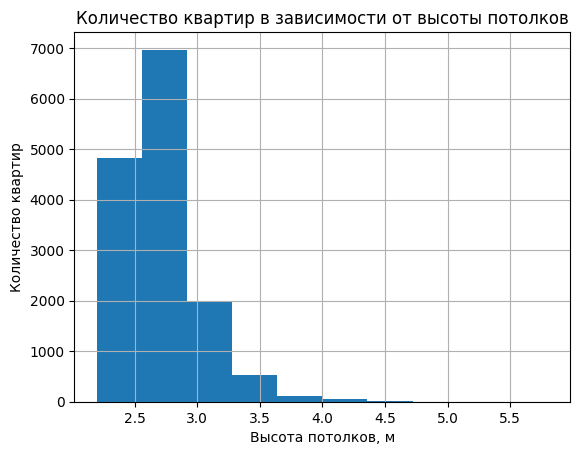

In [19]:
data = data.query('(ceiling_height < 6 and ceiling_height > 2) or ceiling_height.isna()')
fig = data['ceiling_height'].hist()
fig.set_title('Количество квартир в зависимости от высоты потолков')
fig.set_xlabel('Высота потолков, м')
fig.set_ylabel('Количество квартир');

Квартиры, где количество комнат равно 0 (если при этом это не студия) - это явная аномалия, в дополнение, я посчитала, что больше 10 комнат - тоже уже странновато. Проверим, являются ли квартиры с 0 комнатами студиями

In [20]:
print(data.query('rooms == 0')['open_plan'].count())
print(data.query('rooms == 0 and open_plan == True and studio == False')['open_plan'].count())
print(data.query('rooms == 0 and open_plan == False and studio == True')['open_plan'].count())

197
59
138


Оставим только квартиры с 10-ю комнатами и меньше.

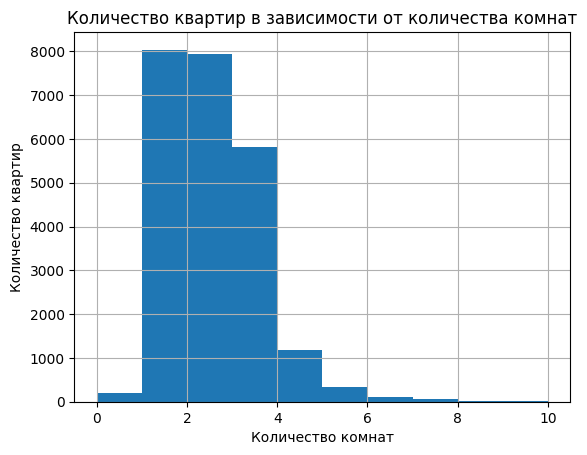

In [21]:
data = data.query('rooms < 11')
pl = data['rooms'].hist()
pl.set_title('Количество квартир в зависимости от количества комнат')
pl.set_xlabel('Количество комнат')
pl.set_ylabel('Количество квартир');

В местоположении есть пропуски, которые можно заменить на категориальную переменную, например, "Неизвестно", это не повлияет на данные

In [22]:
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

Рассмотрим имеющиеся названия мест в столбце locality_name

In [23]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Неизвестно',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'го

Две проблемы в местоположении, которые видно, - это дубликаты из-за "е" и "ё" и дубликаты из-за сокращений. Уберем дубликаты путем замены.

In [24]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')
data['locality_name'] = data['locality_name'].str.replace('посёлок станции', 'посёлок при железнодорожной станции')

In [25]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Неизвестно',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино',
       'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива',
       'деревня Ваганово', 'деревня Вартемяги', 'деревня Вахнова Кара',
   

Список стал меньше, эти дубликаты устранены.

Довольно много пропусков есть в значениях высоты потолков. В списке недвижимости присутствуют как квартиры, так и частные дома,и так как вряд ли в Санкт-Петербурге много домов, а в селах много квартир, высота потолков будет разная. Поэтому логично заполнить пропуски средним значением в зависимости от местоположения. Сгруппируем данные по населенным пунктам для заполнения.

In [26]:
data.pivot_table(index='locality_name', values='ceiling_height').sort_values(by='ceiling_height')

,ceiling_height
locality_name,
Высоцк,2.433333
посёлок городского типа Свирьстрой,2.450000
село Копорье,2.475000
посёлок Гаврилово,2.500000
посёлок городского типа Кондратьево,2.500000
...,...
деревня Каськово,3.000000
деревня Глинка,3.100000
деревня Ваганово,3.150000


Заполним пропуски средним значением по группам.

In [27]:
#переберем имеющиеся населенные пункты
for d in data['locality_name'].unique():
    #выберем ячейки ceiling_height, относящиеся к населенному пункту, со значением NaN и заполним ячейку средним значением по группе
    data.loc[(data['locality_name'] == d) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == d), 'ceiling_height'].mean()

Оставшиеся пропуски заполним медианным значением

In [28]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

Посмотрим на новое распределение

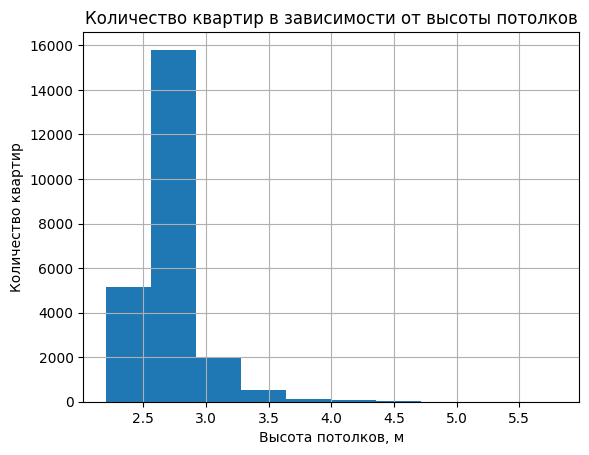

In [29]:
pl2 = data['ceiling_height'].hist()
pl2.set_title('Количество квартир в зависимости от высоты потолков')
pl2.set_xlabel('Высота потолков, м')
pl2.set_ylabel('Количество квартир');

В данных о недвижимости присутствуют пропуски в пунктах о площади кухни и жилой площади. Скорее всего, пропуски в этих данных связаны с отсутствием точных данных у продавца, потому что предполагается, что это данные о продаже жилой площади, а не промышленных объектов, а значит, жилое и кухонное пространство присутствует. Просто взять среднее или медиану точно не стоит, потому что распределение по площади очень широкое (от ~10 м2 до > 600 м2) и может получиться, что площадь кухни, к примеру, больше общей площади квартиры. Поэтому логично примерно представить, какую в среднем часть от квартиры занимает то или иное пространство. Но и здесь можно сильно ошибиться, потому что площадь кухни, например, в студии, занимает очень малое количество относительно общей в обычной квартире. Или, с другой стороны, если у нас в квартире 10 комнат, кухня также, даже, грубо округляя, занимая одну из этих комнат, будет занимать 1/10 от площади квартиры. Поэтому стоит разделить квартиры в зависимости от их общей площади. Я отделила 160-600 м2 квадратных в общую категорию несмотря на большую разницу в показателях, потому что такие квартиры составляют малый процент от общих данных.

In [30]:
#функция, добавляющая категоризацию по площади квартиры
def categorize_flat(flat_area):
    try:
        if 0 <= flat_area <= 30:
            return 'малая площадь'
        elif 30 < flat_area <= 80:
            return 'средняя площадь'
        elif 80 < flat_area <= 160:
            return 'большая площадь'
        elif flat_area > 160:
            return 'очень большая площадь'
    except: 
        pass

Применим категоризацию к данным

In [31]:
data['flat_area_category'] = data['total_area'].apply(categorize_flat)
data['living_area_to_flat_area'] = data['living_area'] / data['total_area']
data['kithen_area_to_flat_area'] = data['kitchen_area'] / data['total_area']

Действительно, доля площади кухни рознится в зависимости от категории

In [32]:
data.pivot_table(index='flat_area_category', values=['living_area_to_flat_area', 'kithen_area_to_flat_area'], aggfunc='median')

,kithen_area_to_flat_area,living_area_to_flat_area
flat_area_category,,
большая площадь,0.140000,0.586804
малая площадь,0.213793,0.586207
очень большая площадь,0.107424,0.600107
средняя площадь,0.179104,0.562500


Заполним пропуски в данных о площади квартиры медианным значением по каждой категории

In [33]:
for d in data['flat_area_category'].unique():
    data.loc[(data['flat_area_category'] == d) & (data['living_area'].isna()), 'living_area'] = \
    (data.loc[(data['flat_area_category'] == d), 'living_area_to_flat_area'].median() * \
    data.loc[(data['flat_area_category'] == d) & (data['living_area'].isna()), 'total_area'])
    
    data.loc[(data['flat_area_category'] == d) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    (data.loc[(data['flat_area_category'] == d), 'kithen_area_to_flat_area'].median() * \
    data.loc[(data['flat_area_category'] == d) & (data['kitchen_area'].isna()), 'total_area'])

В данных о днях показа нет данных о днях показа, равных 0. Возможно, при подсчете дней идет округление до ближайшего, а не "до потолка", поэтому пропуски - это квартиры, которые купили менее, чем за пол дня. Тогда стоит заменить пропуски на 0. Но сначала посмотрим на распределение пропусков по году первого показа, возможно, что это тоже имеет связь.

In [34]:
data.query('days_exposition == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_area_category,living_area_to_flat_area,kithen_area_to_flat_area


Выделим год показа

In [35]:
data['year_first_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [36]:
data['isna'] = data['days_exposition'].isna()

In [37]:
data.pivot_table(index='year_first_exposition', values='isna', aggfunc='sum')

,isna
year_first_exposition,
2014,18
2015,70
2016,67
2017,271
2018,956
2019,1794


Из сводной таблицы можно сделать вывод, что, возможно, пропуски связаны с тем, что квартиру еще не продали, но это не мешает заменить их на 0.

In [38]:
data['days_exposition'] = data['days_exposition'].fillna(0)

Так как данные о близости к центру обычно заполняются автоматически в зависимости от геоданных о местоположении места, то пропуски могут быть объяснены тем, что это не город и не населенный пункт, находящийся к нему достаточно близко, чтобы посчитать расстояние. Или тем, что продавец не вписал адрес. Я считаю, что лучше их не трогать, потому что значение 0 будет искажать данные, как и медианное или среднее. Аналогично с данными об аэропортах.

In [39]:
data.query('not cityCenters_nearest.isna()')['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово',
       'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
       'посёлок Металлострой', 'Павловск', 'Сестрорецк', 'Красное Село',
       'посёлок Понтонный', 'Зеленогорск', 'посёлок Молодёжное',
       'посёлок Стрельна', 'посёлок Александровская', 'Неизвестно',
       'посёлок Песочный', 'посёлок Петро-Славянка', 'посёлок Репино',
       'посёлок Сапёрный', 'посёлок Щеглово', 'посёлок Лисий Нос',
       'посёлок Левашово', 'посёлок Белоостров', 'посёлок Мурино',
       'посёлок Усть-Ижора'], dtype=object)

Тип данных в столбце "studio" string, хотя там только булевы значения, стоит заменить на bool

In [40]:
data['studio'] = data['studio'].astype('bool')

Для удобства переведем значения, которые точно не могут быть вещественными, в int

In [41]:
data['balcony'] = data['balcony'].astype('int64')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')

Также гистограмма для цены выглядит довольно страннно, некоторое количество квартир продается за немыслимые суммы, что, возможно, так и есть, но выбросы очень сильные. С другой стороны, количество выбросов меньше процента от общего количества данных, можно их убрать.

<AxesSubplot:>

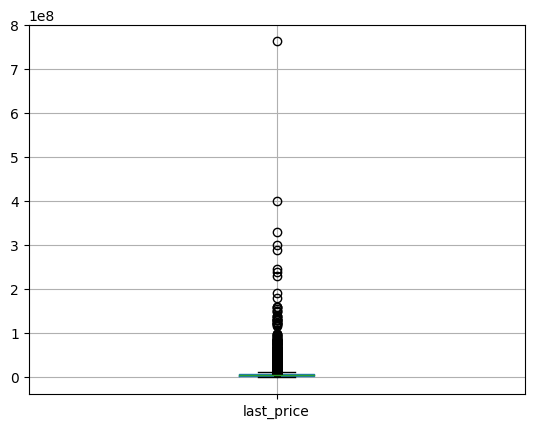

In [42]:
data.boxplot(column='last_price')

In [43]:
data.query('last_price > 60000000')['last_price'].count() / data['last_price'].count()

0.004140611796518506

Не очень честно не учитывать квартиры ценой около 60000000, потому что в больших городах они могут столько стоить, а в малых населенных пунктах вряд ли, но цены сильно бОльше даже для больших городов будут аномальны

<AxesSubplot:>

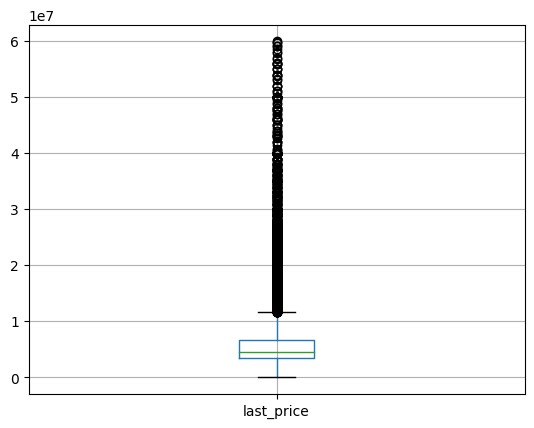

In [44]:
data.query('last_price < 60000000').boxplot(column='last_price')

Теперь выбросов стало меньше

In [45]:
data.query('last_price < 500000').sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_area_category,living_area_to_flat_area,kithen_area_to_flat_area,year_first_exposition,isna
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.750000,25.0,32.00000,25,False,...,1,805.0,0,NaN,8.0,большая площадь,0.293578,0.371560,2019,False
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,2.700000,3.0,30.37500,3,False,...,0,NaN,0,NaN,44.0,средняя площадь,NaN,NaN,2018,False
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,2.578571,2.0,16.00000,1,False,...,0,NaN,0,NaN,0.0,средняя площадь,0.526316,0.197368,2019,True
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,2.700000,5.0,22.50000,1,False,...,0,NaN,0,NaN,45.0,средняя площадь,NaN,NaN,2018,False
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,2.615000,1.0,23.00000,1,False,...,0,NaN,0,NaN,233.0,средняя площадь,0.547619,0.138095,2017,False
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,2.700000,5.0,30.30000,3,False,...,0,NaN,0,NaN,96.0,средняя площадь,0.698157,0.126728,2018,False
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.650000,2.0,21.65625,1,False,...,0,NaN,0,NaN,45.0,средняя площадь,NaN,NaN,2018,False
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,2.700000,5.0,17.30000,4,False,...,0,NaN,0,NaN,120.0,средняя площадь,0.473973,0.232877,2018,False
18867,1,470000.0,41.0,2018-02-11T00:00:00,1,2.700000,5.0,32.00000,3,False,...,0,NaN,0,NaN,46.0,средняя площадь,0.780488,0.219512,2018,False
21912,0,470000.0,37.0,2018-02-18T00:00:00,1,2.600000,3.0,20.81250,3,False,...,0,NaN,0,NaN,45.0,средняя площадь,NaN,NaN,2018,False


Проведем итоговые отсечки по верхней, а также по нижней границе

In [46]:
data = data.query('last_price < 60000000 and last_price > 200000')

Переведем дату первого показа в datetime для удобного использования

In [47]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Итог предобработки:
- пропуски в столбце "is_apartment" соответствуют значению "не апартаменты"
- пропуски в ponds_around3000 и ponds_around3000 соответствуют отсутсвию парков и водоемов в пределах 3 км от объекта продажи или отсутсвию указания геолокации
- пропуски в столбце "balcony" говорят об отсутствии балкона 
- в столбце "ceiling_height" присутствовали аномальные данные (высота потолка 8-30 м), значения в несколько десятков являются ошибкой постановки запятой, они исправлены, аномально высокие и низкие значения потолков обрезаны, пропуски заполнены средним значением по населенному пункту
- количество комнат, равное 0, соответсвует квартирам-студиям или квартирам с открытой планировкой, данные о квартирах с аномально большим количеством комнат обрезаны
- в столбце "locality_name" присутствовали дубликаты, вызванные разницей в "е" и "ё" и сокращениями
- пропуски в значениях площади кухни и жилой зоны заполнены в соответствии со средним отношением к общей площади в зависимости от общей площади квартиры
- пропуски в "days_exposition" соответствуют объявлениям, еще не снятым с продажи
- пропуски в "cityCenters_nearest" связаны с тем, что продавец не ставил геолокацию или населенный пункт слишком далеко от центра какого-либо города
- данные в "studio" была записаны как строка, исправлены на булевы значения
- обрезаны аномально высокие и низкие цены продажи недвижимости

## Работа с признаками

Рассчитаем цену за квадратный метр для каждого объекта недвижимости

In [48]:
data['price_for_meter'] = data['last_price'] / data['total_area']

Добавим день недели, в который недвижимость выставлена на продажу

In [49]:
#функция, которая приводит день недели к стандартному виду из численного
def day(day):
    try:
        if day == 0:
            return 'понедельник'
        elif day == 1:
            return 'вторник'
        elif day == 2:
            return 'среда'
        elif day == 3:
            return 'четверг'
        elif day == 4:
            return 'пятница'
        elif day == 5:
            return 'суббота'
        elif day == 6:
            return 'воскресенье'
    except:
        pass

Применим функцию к данным

In [50]:
data['weekday_first_exposition_number'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['weekday_first_exposition'] = data['weekday_first_exposition_number'].apply(day)

Добавим месяц и год

In [51]:
data['month_first_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

Добавим тип этажа

In [52]:
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[~(data['floor_type'] == 'последний') & ~(data['floor_type'] == 'первый'), 'floor_type'] = 'другой'

Добавим рассотяние до центра, округлив его вверх, чтобы не было нулей

In [53]:
data['cityCenters_nearest, km'] = np.ceil(data['cityCenters_nearest'] / 1000)

## Исследовательский анализ данных

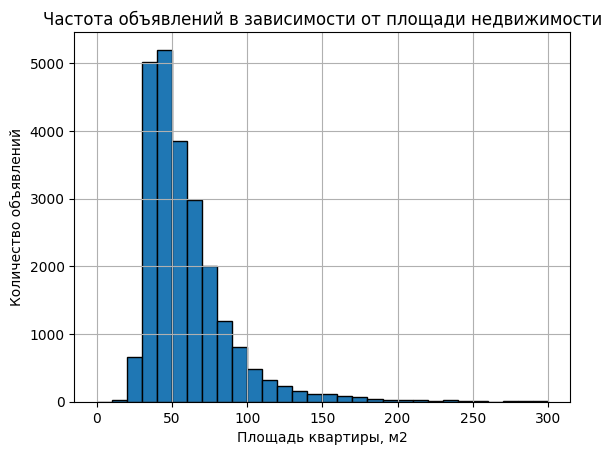

In [54]:
ax = data['total_area'].hist(bins=30, range=(0,300), edgecolor='black')
ax.set_title('Частота объявлений в зависимости от площади недвижимости')
ax.set_xlabel('Площадь квартиры, м2')
ax.set_ylabel('Количество объявлений');

Большинство продаваемой недвижимости имеет площадь 30-60 м2, что соответствует 1-3 комнатной квартире

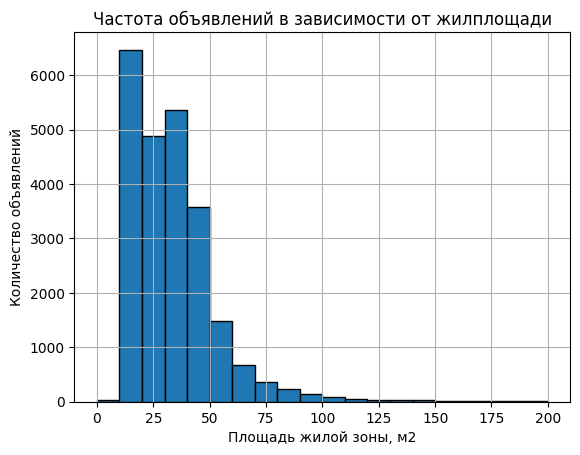

In [55]:
ax = data['living_area'].hist(bins=20, range=(0,200), edgecolor='black')
ax.set_title('Частота объявлений в зависимости от жилплощади')
ax.set_xlabel('Площадь жилой зоны, м2')
ax.set_ylabel('Количество объявлений');

Гистограмма распределения жилой площади соответсвует гистограмме общей площади, большиснтво квартир имеют жилую площадь 10-40 м2, половина-2/3 от площади 1-3хкомнатной квартиры

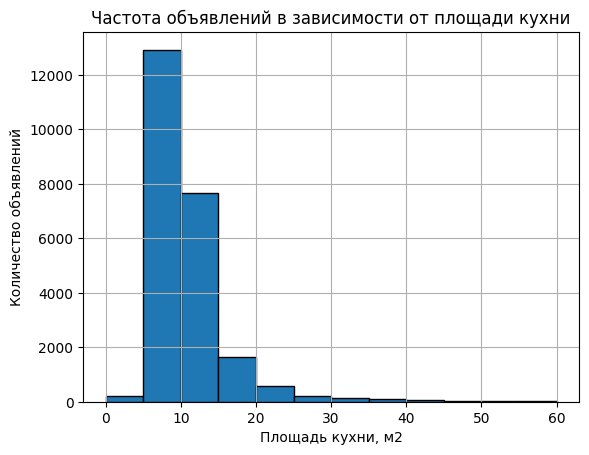

In [56]:
ax = data['kitchen_area'].hist(bins=12, range=(0,60), edgecolor='black')
ax.set_title('Частота объявлений в зависимости от площади кухни')
ax.set_xlabel('Площадь кухни, м2')
ax.set_ylabel('Количество объявлений');

Площадь кухонь чаще всего 5-15 м2, 5-10, скорее всего, относится к однокомнатным и студиям

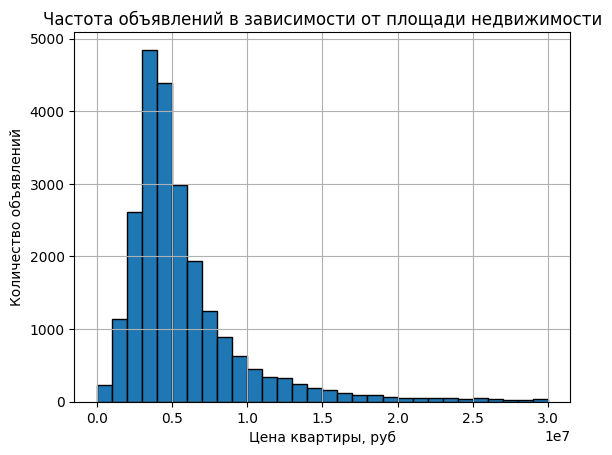

In [57]:
ax = data['last_price'].hist(bins=30, range=(0,30000000), edgecolor='black')
ax.set_title('Частота объявлений в зависимости от площади недвижимости')
ax.set_xlabel('Цена квартиры, руб')
ax.set_ylabel('Количество объявлений');

Цена таких квартир в большинстве составляет от 3 до 6 миллионов, что характерно для России, за исключением больших городов

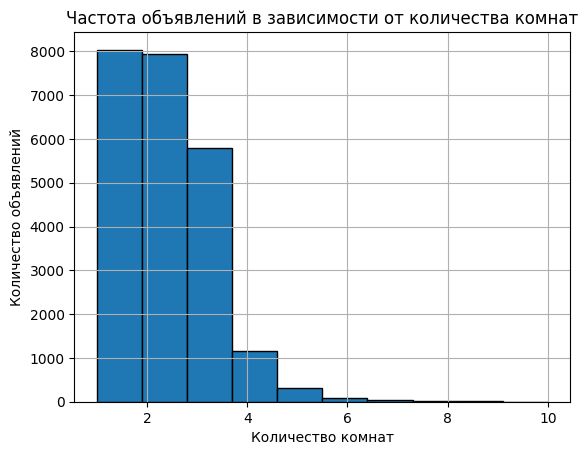

In [58]:
ax = data['rooms'].hist(bins=10, range=(1,10), edgecolor='black')
ax.set_title('Частота объявлений в зависимости от количества комнат')
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Количество объявлений');

Действительно, в большинстве продаются 1-3-хкомнатные квартиры

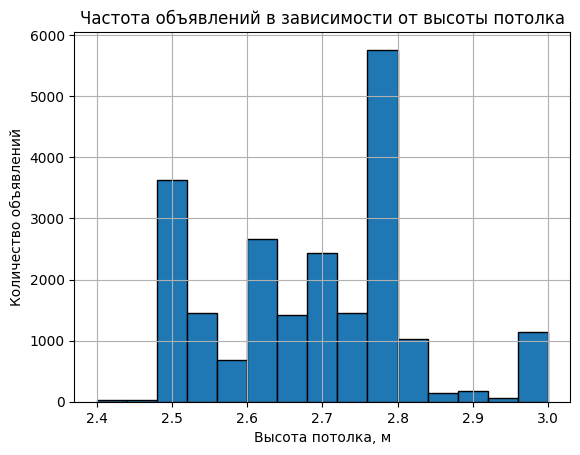

In [59]:
ax = data['ceiling_height'].hist(bins=15, range=(2.4,3), edgecolor='black')
ax.set_title('Частота объявлений в зависимости от высоты потолка')
ax.set_xlabel('Высота потолка, м')
ax.set_ylabel('Количество объявлений');

Высота потолков в большинстве квартир находится в промежутке 2.5-2.8 м, при этом чаще 2.5 или 2.8 м. 2.5 - это значение, близкое к минимальным требованиям, скорее всего, такие потолки в старых домах (например, 5-этажках), 2.7-2.8 м - это типичная высота потолка в новостройке.

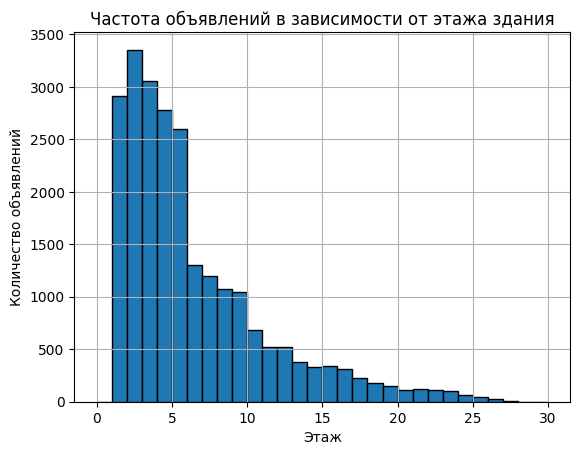

In [60]:
ax = data['floor'].hist(bins=30, range=(0,30), edgecolor='black')
ax.set_title('Частота объявлений в зависимости от этажа здания')
ax.set_xlabel('Этаж')
ax.set_ylabel('Количество объявлений');

Чаще всего продают квартиры на первых 5-6 этажах. Примерно вдвое меньше продают квартиры вплоть до 10-го этажа, дальше продажа идет на спад. Это связано с тем, что многоэтажные дома появились заметно позже 5 и 9-этажек, поэтому помимо того, что в статистику попадают квартиры из этих домов, на нее влияет гораздо большее количество низких построек, чем высоких.

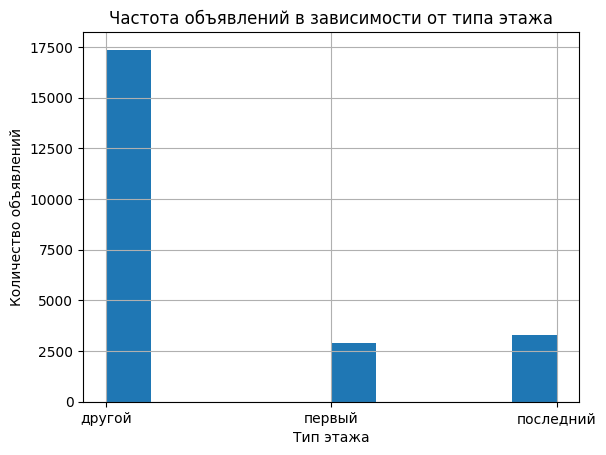

In [61]:
ax = data['floor_type'].hist()
ax.set_title('Частота объявлений в зависимости от типа этажа')
ax.set_xlabel('Тип этажа')
ax.set_ylabel('Количество объявлений');

Логично, что если в домах первый и последний этаж - это в сумме всего два этажа, то вероятность, что продают квартиру на этих этажах сильно меньше, чем на всех остальных. Но можно заметить, что немного чаще продают квартиры на последнем этаже, чем на первом.

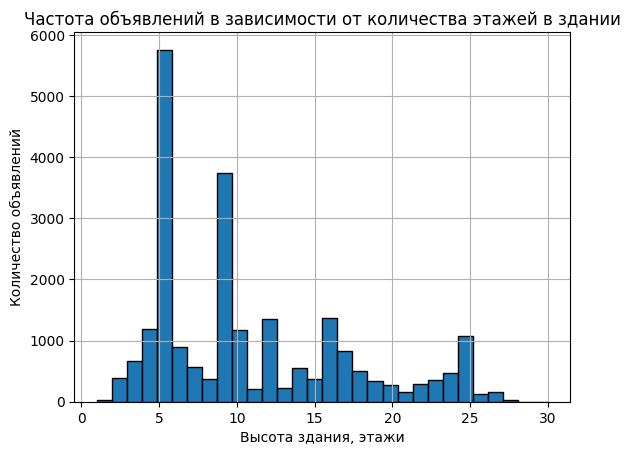

In [62]:
ax = data['floors_total'].hist(bins=30, range=(1,30), edgecolor='black')
ax.set_title('Частота объявлений в зависимости от количества этажей в здании')
ax.set_xlabel('Высота здания, этажи')
ax.set_ylabel('Количество объявлений');

Эта гистограмма подтверждает мысль про 5 и 9-этажки. Действительно, чаще всего продают квартиры в этих типах домов из-за их распространенности.

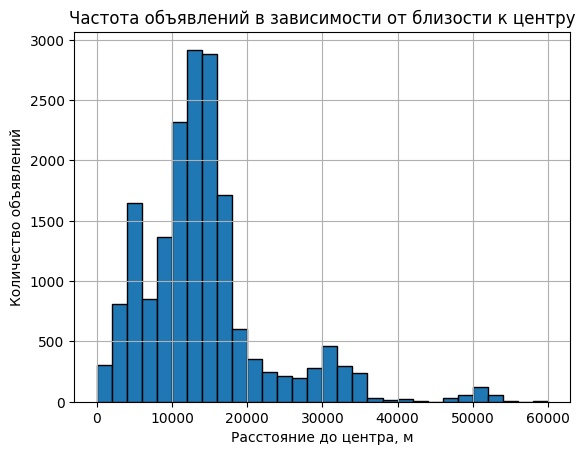

In [63]:
ax = data['cityCenters_nearest'].hist(bins=30, range=(0,60000), edgecolor='black')
ax.set_title('Частота объявлений в зависимости от близости к центру')
ax.set_xlabel('Расстояние до центра, м')
ax.set_ylabel('Количество объявлений');

Наиболее часто продают квартиры в 10-18 км от центра города и еще на гистограмме присутствует небольшой пик на 4-6 км. Т.е. чаще всего продается недвижимость в городах или в ближаших к ним населенных пунктах.

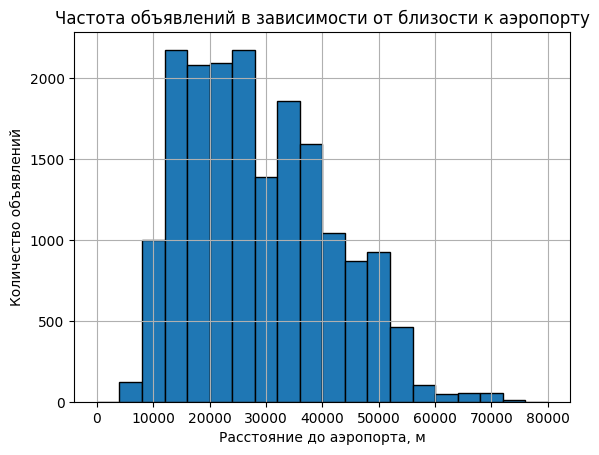

In [64]:
ax = data['airports_nearest'].hist(bins=20, range=(0,80000), edgecolor='black')
ax.set_title('Частота объявлений в зависимости от близости к аэропорту')
ax.set_xlabel('Расстояние до аэропорта, м')
ax.set_ylabel('Количество объявлений');

Гистограмма дальности от аэропортов имеет довольно широкое распределение, но можно выделить, что чаще всего продаваемые квартиры находятся в 12-28 км от аэропорта, что вполне логично для квартир, находящихся на периферии города, так как аэропорты тоже находятся за его границей.

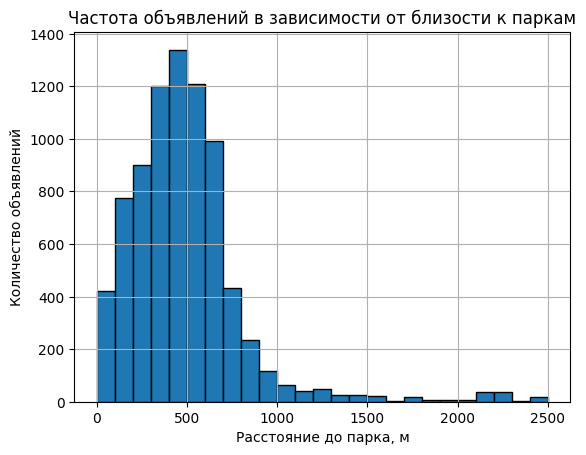

In [65]:
ax = data['parks_nearest'].hist(bins=25, range=(0,2500), edgecolor='black')
ax.set_title('Частота объявлений в зависимости от близости к паркам')
ax.set_xlabel('Расстояние до парка, м')
ax.set_ylabel('Количество объявлений');

Чаще всего продают квартиры в пределах 600 метров от какого-либо парка, если он есть.

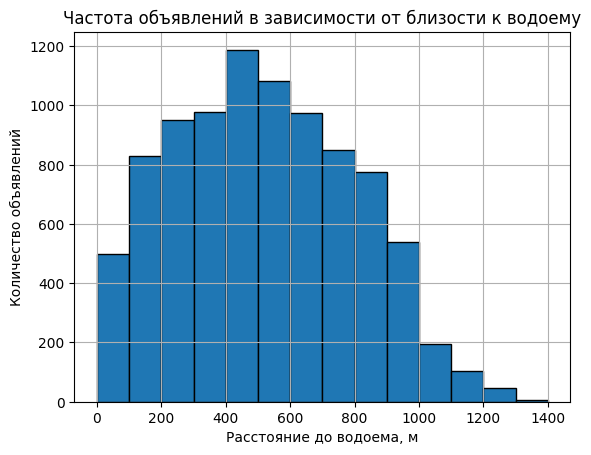

In [66]:
ax = data['ponds_nearest'].hist(bins=14, range=(0,1400), edgecolor='black')
ax.set_title('Частота объявлений в зависимости от близости к водоему')
ax.set_xlabel('Расстояние до водоема, м')
ax.set_ylabel('Количество объявлений');

Примерно в таких же пределах расстояний (200-600 метров) находятся и водоемы, что логично, потому что часто водоем чаще всего является частью парка (исключения: города, стоящие вдоль реки, не окруженной парковой зоной).

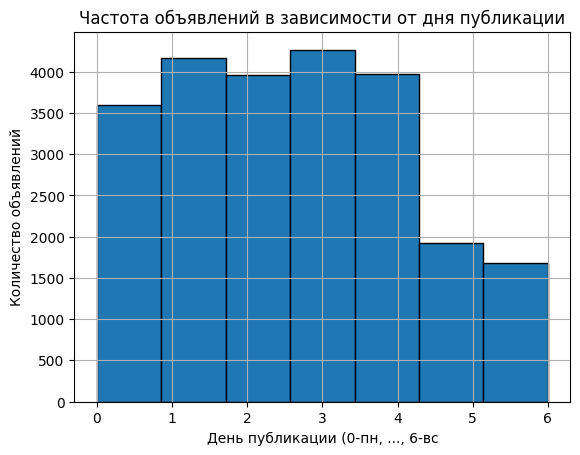

In [67]:
ax = data['weekday_first_exposition_number'].hist(bins=7, range=(0,6), edgecolor='black')
ax.set_title('Частота объявлений в зависимости от дня публикации')
ax.set_xlabel('День публикации (0-пн, ..., 6-вс')
ax.set_ylabel('Количество объявлений');

Недвижимость чаще выставляют на продажу в будние дни, но есть и те, кто делает это в выходные. Самые популярные дни для публикации - вторник и четверг.

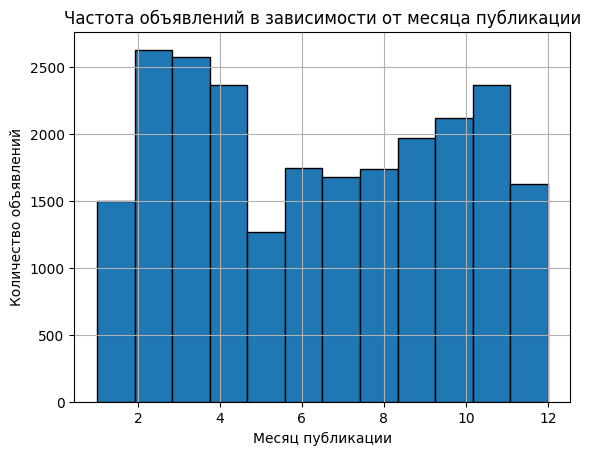

In [68]:
ax = data['month_first_exposition'].hist(bins=12, range=(1,12), edgecolor='black')
ax.set_title('Частота объявлений в зависимости от месяца публикации')
ax.set_xlabel('Месяц публикации')
ax.set_ylabel('Количество объявлений');

Меньше всего квартир выставляют на продажу в декабре-январе и мае, больше всего с февраля по апрель и в ноябре.

Итог: При первичном анализе информации можно выделить, что:
- больше всего продается 1-3х-комнатных квартир в 5- и 9-тиэтажках
- с жилой площадью 10-40 м2
- кухней 5-15 м2
- с потолками высоты 2.5-2.8 м
- за цену в 3000000-6000000 рублей. 
- такие квартиры чаще всего находятся в 10-20 км от центра (на периферии), 15-30 км от аэропортов и недалеко от парков и прудов. 
- выставляют квартиры обычно в будние дни.

Так как я делала предположение, что пропуски в количестве дней - это нули, на всякий случай имеет смысл посмотреть статистику как с нулями, так и без нулей

In [69]:
data['days_exposition'].describe()

count    23569.000000
mean       156.072511
std        212.944354
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [70]:
data.query('days_exposition != 0')['days_exposition'].describe()

count    20412.000000
mean       180.211297
std        219.108713
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Распределение довольно широкое, среднеквадратичная ошибка очень большая относительно единиц измерения, а медиана и среднее в обоих случаях отличаются примерно в два раза. Т.е. есть квартиры, которые продавали годами, до 4-х с лишним лет, а есть большое количество быстро проданных квартир, за счет чего медиана не близится к максимуму.

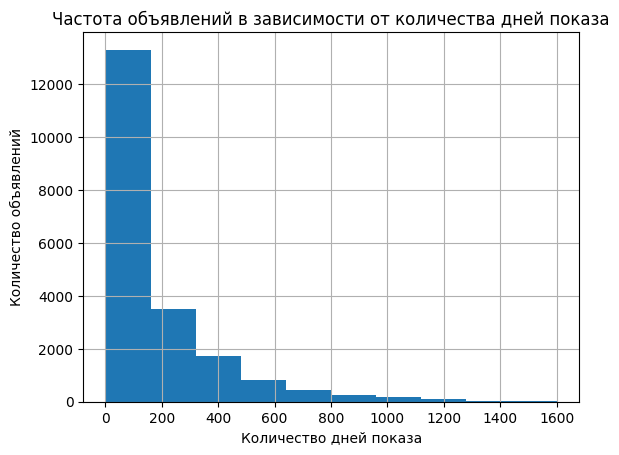

In [71]:
plt = data['days_exposition'].hist(range=(1,1600))
plt.set_title('Частота объявлений в зависимости от количества дней показа')
plt.set_xlabel('Количество дней показа')
plt.set_ylabel('Количество объявлений');

Даже без учета нулей видно, что большинство квартир продается менее, чем за пол года-год, стоит присмотреться внимательнее

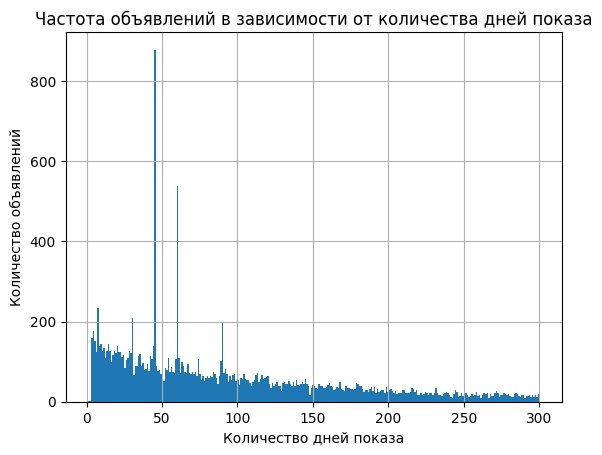

In [72]:
plt = data['days_exposition'].hist(range=(1,300), bins=300)
plt.set_title('Частота объявлений в зависимости от количества дней показа')
plt.set_xlabel('Количество дней показа')
plt.set_ylabel('Количество объявлений');

Итак, большинство квартир продается в течение первых 150 дней, наиболее часто в течение первых 50-80, т.е. 2-2,5 месяце, что можно считать "быстрой продажей"

Посмотрим на корреляцию признаков

In [73]:
data.corr().sort_values(by='last_price', ascending=False)['last_price']

last_price                         1.000000
total_area                         0.778528
price_for_meter                    0.695374
living_area                        0.694346
kitchen_area                       0.609052
rooms                              0.501282
ceiling_height                     0.431061
ponds_around3000                   0.291111
parks_around3000                   0.288542
total_images                       0.146276
isna                               0.126462
days_exposition                    0.069297
floor                              0.046436
is_apartment                       0.045829
balcony                            0.027397
floors_total                       0.027285
living_area_to_flat_area           0.007510
month_first_exposition             0.004817
parks_nearest                     -0.005537
weekday_first_exposition_number   -0.017405
open_plan                         -0.023355
airports_nearest                  -0.036675
studio                          

Если учитывать факторы, которые имеют коэффициент корреляции больше 0.5 или меньше -0.5 как наиболее влияющие на цену, то можно сказать, что в основном на цену квартиры влияет ее площадь и, соответственно, площадь ее жилого и кухонного пространства и количество комнат. Эти корреляции положительные, значит, чем больше площадь квартиры, тем она дороже продавалась.

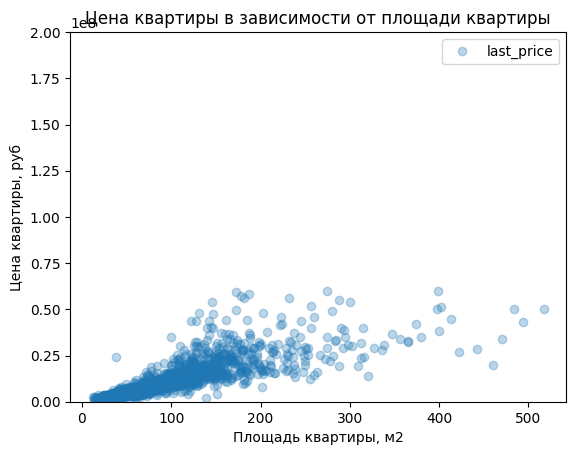

In [74]:
plt = (data
 .pivot_table(index='total_area', values='last_price')
 .plot(style='o', alpha=0.3, ylim=(0, 200000000))
)
plt.set_title('Цена квартиры в зависимости от площади квартиры')
plt.set_xlabel('Площадь квартиры, м2')
plt.set_ylabel('Цена квартиры, руб');

По графику площадь квартиры в диапазоне до 100 м2 визуально влияет на цену продажи квартиры почти линейно, при больших площадях уже сложнее увидеть какую-либо зависимость

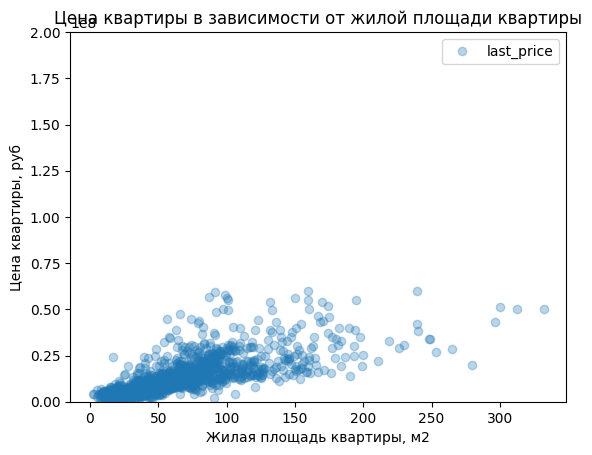

In [75]:
plt = (data
 .pivot_table(index='living_area', values='last_price')
 .plot(style='o', alpha=0.3, ylim=(0, 200000000))
)
plt.set_title('Цена квартиры в зависимости от жилой площади квартиры')
plt.set_xlabel('Жилая площадь квартиры, м2')
plt.set_ylabel('Цена квартиры, руб');

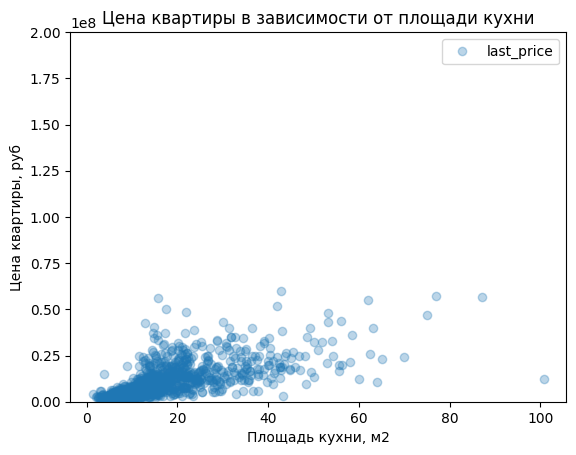

In [76]:
plt = (data
 .pivot_table(index='kitchen_area', values='last_price')
 .plot(style='o', alpha=0.3, ylim=(0, 200000000))
)
plt.set_title('Цена квартиры в зависимости от площади кухни')
plt.set_xlabel('Площадь кухни, м2')
plt.set_ylabel('Цена квартиры, руб');

В целом, действительно, чем больше кухня и жилое пространство, тем дороже продавалась квартира

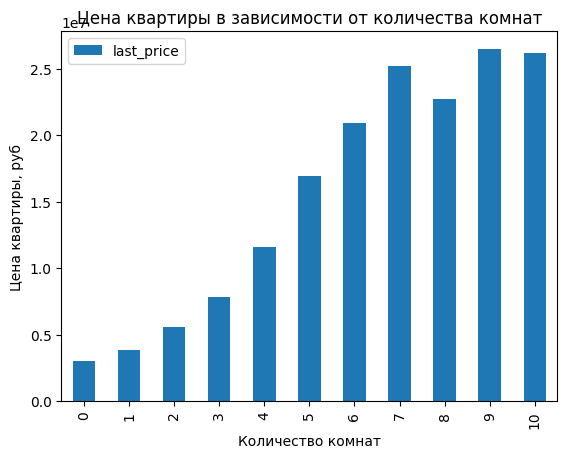

In [77]:
plt = (data
 .pivot_table(index='rooms', values='last_price')
 .plot(style='o', kind='bar')
)
plt.set_title('Цена квартиры в зависимости от количества комнат')
plt.set_xlabel('Количество комнат')
plt.set_ylabel('Цена квартиры, руб');

Чем больше комнат, тем больше цена за квартиру, при этом 8-комнатные квартиры продавали дешевле, чем 7-комнатные

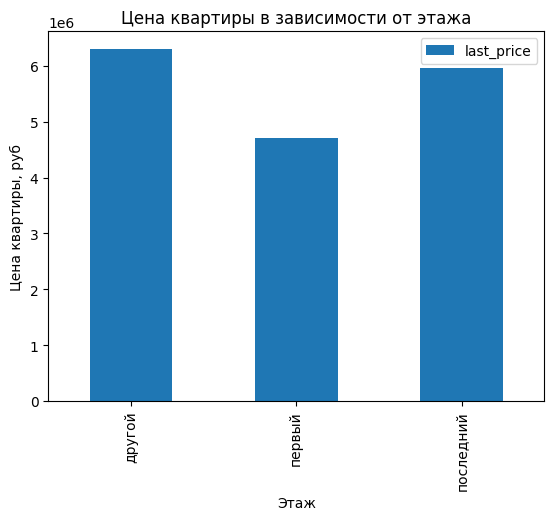

In [78]:
plt = (data
 .pivot_table(index='floor_type', values='last_price')
 .plot(style='o', kind='bar')
)
plt.set_title('Цена квартиры в зависимости от этажа')
plt.set_xlabel('Этаж')
plt.set_ylabel('Цена квартиры, руб');

Квартиры на первом этаже продаются заметно дешевле остальных

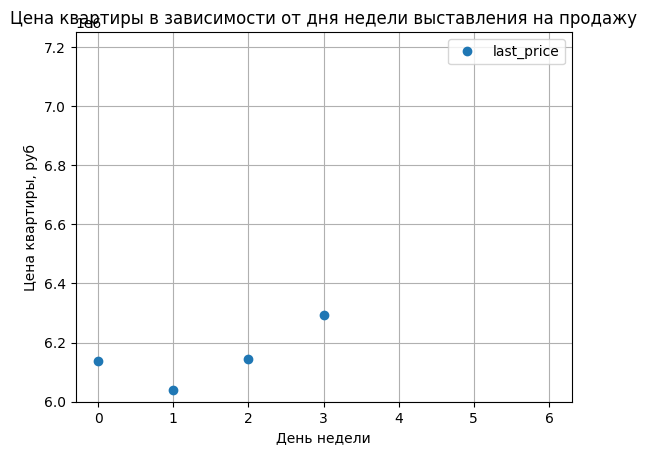

In [79]:
plt = (data
 .pivot_table(index='weekday_first_exposition_number', values='last_price')
 .plot(ylim=(6000000, 7250000), style='o', grid=True)
)
plt.set_title('Цена квартиры в зависимости от дня недели выставления на продажу')
plt.set_xlabel('День недели')
plt.set_ylabel('Цена квартиры, руб');

По воскресеньям цены устанавливаются на самом низком уровне

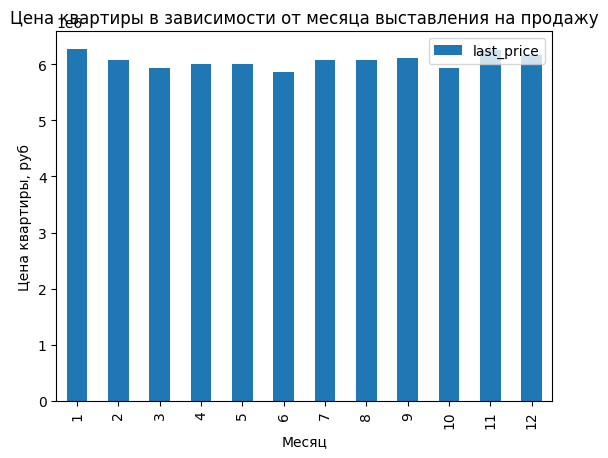

In [80]:
plt = (data
 .pivot_table(index='month_first_exposition', values='last_price')
 .plot(kind='bar')
)
plt.set_title('Цена квартиры в зависимости от месяца выставления на продажу')
plt.set_xlabel('Месяц')
plt.set_ylabel('Цена квартиры, руб');

Месяц значимо не влияет

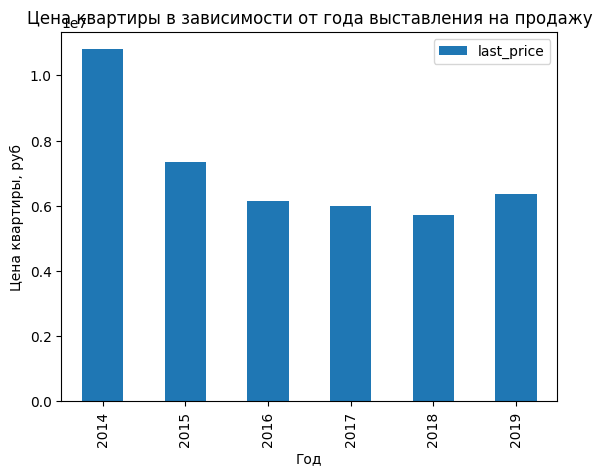

In [81]:
plt = (data
 .pivot_table(index='year_first_exposition', values='last_price')
 .plot(kind='bar')
)
plt.set_title('Цена квартиры в зависимости от года выставления на продажу')
plt.set_xlabel('Год')
plt.set_ylabel('Цена квартиры, руб');

В 2014 квартиры продавали дороже, до 2018 цены на недвижимость уменьшались.

Итог: исходя из графиков, можно выделить, что:

Месяц и день недели первого показа объявления не влияет на цену его продажи
С 2014 по 2018 произошел спад цены продажи примерно в 2 раза
Квартиры на 1-м этаже продаются дешевле
Площадь квартиры и выходящие из этого парамметры (площадь кухни, жилая плозадь, количество комнат) больше всего влияют на цену продажи

Посчитаем, сколько в среднем стоит 1 м2 в топ-10 городах с самым большим количеством продаж недвижимости

In [82]:
top_cities = list(data['locality_name'].value_counts()[:10].index)

In [83]:
data.query('locality_name in @top_cities')['price_for_meter'].mean()

107138.35980905667

Посмотрим, в каком из городов из топ-10 дешевле всего купить квартиру, а в каком дороже

In [84]:
(data
 .query('locality_name in @top_cities')
 .pivot_table(index='locality_name', values='price_for_meter')
 .sort_values(by='price_for_meter')

)

,price_for_meter
locality_name,
Выборг,58238.143141
Всеволожск,68719.320400
Гатчина,68746.146763
Колпино,75424.579098
посёлок Шушары,78677.364217
посёлок Мурино,85681.762601
посёлок Парголово,90175.913458
деревня Кудрово,92473.547576
Пушкин,103125.819291


 Среди самых населенных городов дешевле всего стоит м2 в Выборге, дороже всего в Санкт-Петербурге

Посмотрим, как меняется цена недвижимости в зависимости от близости к центру

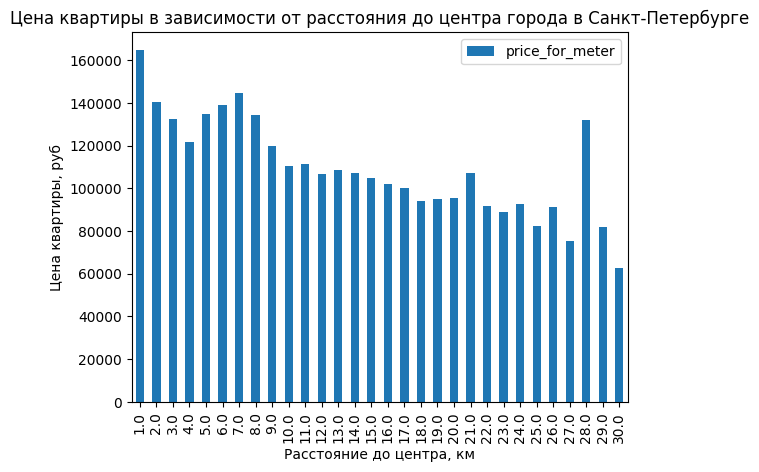

In [85]:
plt = (data
 .query('locality_name == "Санкт-Петербург"')
 .pivot_table(index='cityCenters_nearest, km', values='price_for_meter')
 .plot(kind='bar')
)
plt.set_title('Цена квартиры в зависимости от расстояния до центра города в Санкт-Петербурге')
plt.set_xlabel('Расстояние до центра, км')
plt.set_ylabel('Цена квартиры, руб');

Чем ближе к центру, тем дороже недвижимость

## Общий вывод

- Чаще всего квартиры выставляют в будние дни. Наиболее часто встречающиеся на агрегаторе квартиры - это квартиры от 1 до 3-х комнат плозадью до 40 м2 в 5- и 9-этажных зданиях с потолками 2.5-2.8 м (обычные потолки) на периферии города недалко от парков или водоемов. Цена наиболее часто продаваемых квартир 3-6 миллионов рублей.
- "Быстрая продажа" квартиры - это продажа в течение первых 2-2,5 месяцев
- На цену продажи не влияет день или месяц, в который выставляется объявление. На нее, во-первых, влияет этаж, на котором находится квартира - квартиры на 1-м этаже продаются дешевле. Во-вторых, на цену продажи влияет площадь квартиры и исходящие из этого ее параметры (площадь кухни, жилой зоны, количество комнат). Самая дорогая недвижимость (цена за м2) находится в Санкт-Петербурге и его окрестностях, самая дешевая - в малых деревнях и поселках. На цену дополнительно влияет близость к центру города, чем ближе, тем выше цена. В среднем при покупке квартиры в крпных городах нужно заплатить 107 тысяч рублей за м2.
- С 2014-го до 2018-го года цена продажи недвижимости упала почти вдвое
